In [1]:
!pip install kagglehub

In [2]:
import kagglehub


path = kagglehub.dataset_download("arshid/iris-flower-dataset")

print("Path to dataset files:", path)

100%|██████████| 0.99k/0.99k [00:00<00:00, 1.86MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/arshid/iris-flower-dataset/versions/1


In [5]:
import pandas as pd
import os

file_path = os.path.join(path, 'Iris.csv')

df = pd.read_csv(file_path)

In [6]:

import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

#data preprocessing
from sklearn.preprocessing import LabelEncoder

#model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold

#for ML Model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

#for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  150
Number of columns are:  5


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 3


In [13]:
duplicates_all = df[df.duplicated(keep=False)]
print(duplicates_all)


     sepal_length  sepal_width  petal_length  petal_width         species
9             4.9          3.1           1.5          0.1     Iris-setosa
34            4.9          3.1           1.5          0.1     Iris-setosa
37            4.9          3.1           1.5          0.1     Iris-setosa
101           5.8          2.7           5.1          1.9  Iris-virginica
142           5.8          2.7           5.1          1.9  Iris-virginica


In [14]:
df_cleaned = df.drop_duplicates()


In [19]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [23]:
print(df.isnull().values.any())


False


In [20]:
df_cleaned.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [21]:
df_cleaned.describe(include= 'all').round(2)

,sepal_length,sepal_width,petal_length,petal_width,species
count,147.00,147.00,147.00,147.00,147
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.86,3.06,3.78,1.21,NaN
std,0.83,0.44,1.76,0.76,NaN
min,4.30,2.00,1.00,0.10,NaN
25%,5.10,2.80,1.60,0.30,NaN
50%,5.80,3.00,4.40,1.30,NaN
75%,6.40,3.30,5.10,1.80,NaN


from matplotlib import pyplot as plt
_df_0['sepal_length'].plot(kind='hist', bins=20, title='sepal_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['sepal_width'].plot(kind='hist', bins=20, title='sepal_width')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['petal_length'].plot(kind='hist', bins=20, title='petal_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['petal_width'].plot(kind='hist', bins=20, title='petal_width')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('species').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='sepal_length', y='sepal_width', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='sepal_width', y='petal_length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='petal_length', y='petal_width', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['sepal_length'].plot(kind='line', figsize=(8, 4), title='sepal_length')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['sepal_width'].plot(kind='line', figsize=(8, 4), title='sepal_width')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['petal_length'].plot(kind='line', figsize=(8, 4), title='petal_length')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['petal_width'].plot(kind='line', figsize=(8, 4), title='petal_width')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['species'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='sepal_length', y='species', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['species'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='sepal_width', y='species', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['species'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='petal_length', y='species', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['species'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='petal_width', y='species', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [29]:
colors = ['red', 'yellow', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [34]:
data = df_cleaned.copy()


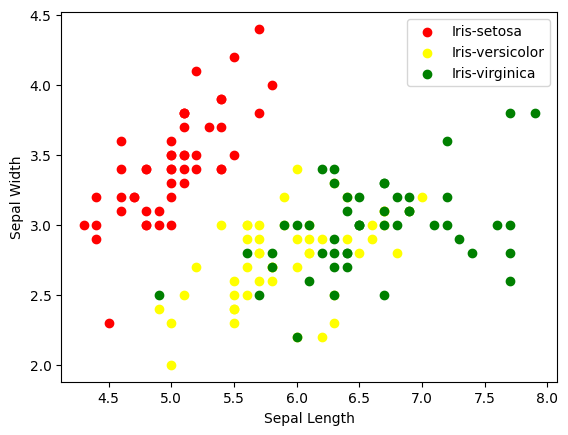

In [37]:

# Create a scatter plot for Sepal Length vs Sepal Width for each species.
for i in range(3):

    x = data[data['species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['sepal_length'], x['sepal_width'], c=colors[i], label=species[i])


plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
.
plt.legend()

# Display
plt.show()

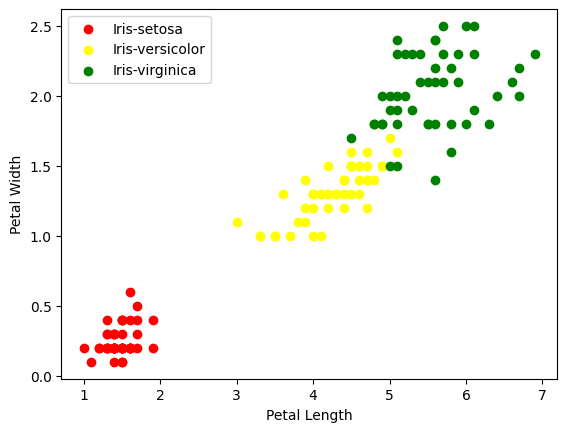

In [39]:

# Create a scatter plot for Petal Length vs Petal Width for each species.
for i in range(3):

    x = data[data['species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['petal_length'], x['petal_width'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.legend()

# Display
plt.show()

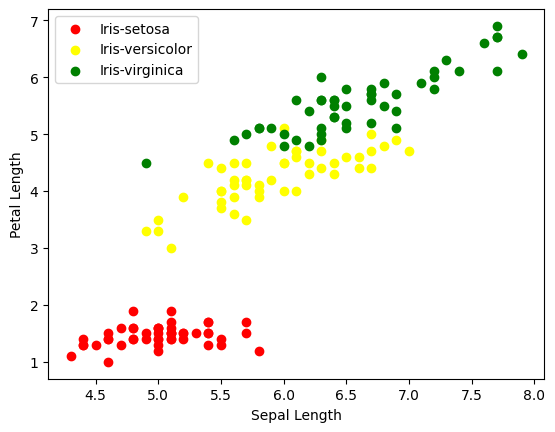

In [40]:

# Create a scatter plot for Sepal Length vs Petal Length for each species.
for i in range(3):

    x = data[data['species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['sepal_length'], x['petal_length'], c=colors[i], label=species[i])

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

plt.legend()

# Display
plt.show()

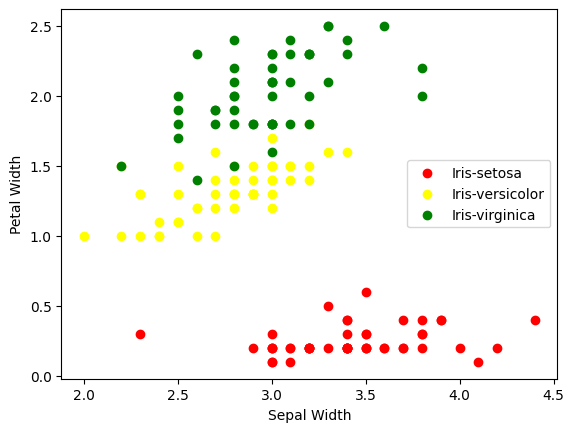

In [41]:

# Create a scatter plot for Sepal Width vs Petal Width for each species.
for i in range(3):

    x = data[data['species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['sepal_width'], x['petal_width'], c=colors[i], label=species[i])

plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

plt.legend()

# Display
plt.show()

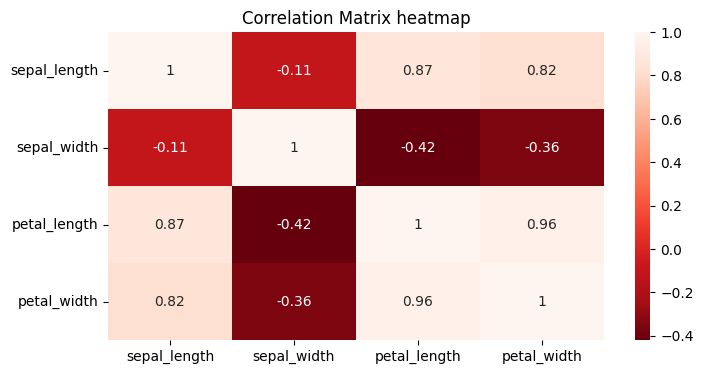

In [44]:
#Correlation Heatmap Visualization Code

numeric_data = data.select_dtypes(include=np.number)

corr_matrix = numeric_data.corr()

# Plot Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Reds_r')

# Setting Labels
plt.title('Correlation Matrix heatmap')

# Display Chart
plt.show()

In [46]:
# Encode the categorical columns

le = LabelEncoder()

# Encode the 'Species' column to convert the species names to numerical labels
data['species'] = le.fit_transform(data['species'])


unique_species = data['species'].unique()

# Display
print("Encoded Species Values:")
print(unique_species) # 'Iris-setosa' == 0, 'Iris-versicolor' == 1, 'Iris-virginica' == 2

Encoded Species Values:
[0 1 2]


In [49]:
# Defining the X and y
x=data.drop(columns=['species'], axis=1)
y=data['species']

In [50]:
# Splitting the data to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

In [51]:

y_train.value_counts()

,count
species,
1,35
2,34
0,33


In [101]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    '''Evaluates the given model using various metrics.

    This function takes a model, training and testing data, fits the model,
    makes predictions, and then prints or returns evaluation metrics
    such as confusion matrices, classification reports, and accuracy scores.

    Args:
        model: The machine learning model to evaluate.
        x_train: The training data features.
        x_test: The testing data features.
        y_train: The training data target variable.
        y_test: The testing data target variable.

    Returns:
        A list containing the following scores:
            recall_train, recall_test, acc_train, acc_test, F1_train, F1_test
    '''

    model.fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # Calculate confusion matrices
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    # Print confusion matrices using heatmaps
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    sns.heatmap(cm_train, annot=True, fmt='d', cmap="Oranges", ax=ax[0])  # fmt='d' for integers
    ax[0].set_title("Train Confusion Matrix")
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    sns.heatmap(cm_test, annot=True, fmt='d', cmap="Oranges", ax=ax[1])  # fmt='d' for integers
    ax[1].set_title("Test Confusion Matrix")
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    plt.tight_layout()
    plt.show()

    # Calculate classification reports
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)

    # Print classification reports
    print("\nTrain Classification Report:")
    print(pd.DataFrame(cr_train).T.to_markdown())  # Use to_markdown()
    print("\nTest Classification Report:")
    print(pd.DataFrame(cr_test).T.to_markdown())  # Use to_markdown()

    # Extract relevant metrics
    precision_train = cr_train['macro avg']['precision']
    precision_test = cr_test['macro avg']['precision']
    recall_train = cr_train['macro avg']['recall']
    recall_test = cr_test['macro avg']['recall']
    acc_train = cr_train['accuracy']
    acc_test = cr_test['accuracy']
    F1_train = cr_train['macro avg']['f1-score']
    F1_test = cr_test['macro avg']['f1-score']

    return [precision_train,precision_test,recall_train, recall_test, acc_train, acc_test, F1_train, F1_test]

In [89]:
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])


In [54]:
# ML Model - 1 Implementation
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)

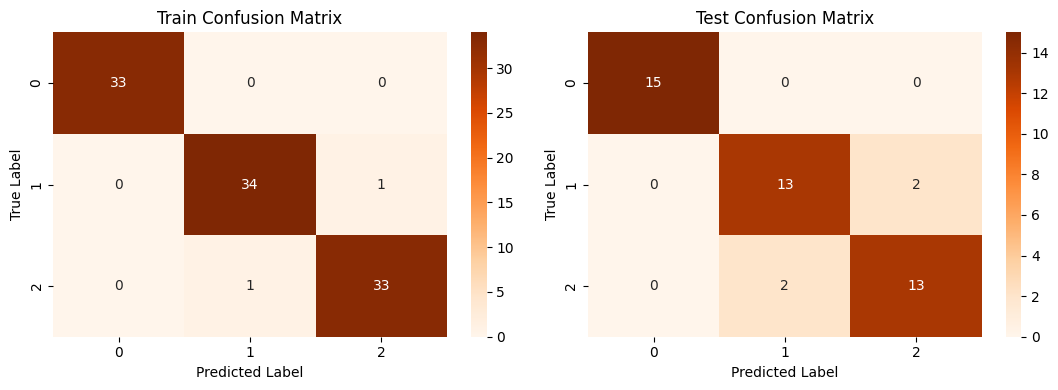


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  33        |
| 1            |    0.971429 | 0.971429 |   0.971429 |  35        |
| 2            |    0.970588 | 0.970588 |   0.970588 |  34        |
| accuracy     |    0.980392 | 0.980392 |   0.980392 |   0.980392 |
| macro avg    |    0.980672 | 0.980672 |   0.980672 | 102        |
| weighted avg |    0.980392 | 0.980392 |   0.980392 | 102        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.866667 | 0.866667 |   0.866667 | 15        |
| 2            |    0.866667 | 0.866667 |   0.866667 | 15        |
| accuracy     |    0.911111 | 0.911111 |   0.911111 |  0.9111

In [90]:
lr_score = evaluate_model(lr_model, x_train, x_test, y_train, y_test)

In [98]:
score['Logistic regression'] = lr_score
score

,Neural Network tuned,Logistic regression
Precision Train,0.981481,0.980672
Precision Test,0.960784,0.911111
Recall Train,0.980952,0.980672
Recall Test,0.955556,0.911111
Accuracy Train,0.980392,0.980392
Accuracy Test,0.955556,0.911111
F1 macro Train,0.980672,0.980672
F1 macro Test,0.955357,0.911111


In [58]:
# ML Model - 1 Implementation with hyperparameter optimization techniques

# Define the hyperparameter grid
param_grid = {
    'C': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  # Optimization algorithms
}

# Initializing the logistic regression model
logreg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)

# Repeated stratified k-fold for robust cross-validation
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=0)

# Hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=rskf, scoring='accuracy')
# scoring='accuracy' explicitly sets accuracy as the evaluation metric
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Optimal Hyperparameters:", best_params)

# Optionally, you can evaluate the model with the best hyperparameters:
best_logreg = grid_search.best_estimator_
# lr_score = evaluate_model(best_logreg, x_train, x_test, y_train, y_test)

Optimal Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


In [59]:
lr_model2 = LogisticRegression(C=best_params['C'],
                                  penalty=best_params['penalty'],
                                  solver=best_params['solver'],
                                  max_iter=10000, random_state=0)


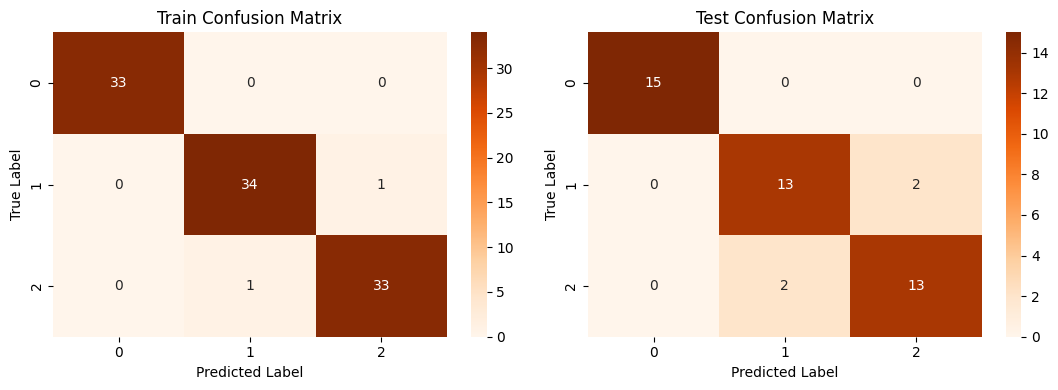


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  33        |
| 1            |    0.971429 | 0.971429 |   0.971429 |  35        |
| 2            |    0.970588 | 0.970588 |   0.970588 |  34        |
| accuracy     |    0.980392 | 0.980392 |   0.980392 |   0.980392 |
| macro avg    |    0.980672 | 0.980672 |   0.980672 | 102        |
| weighted avg |    0.980392 | 0.980392 |   0.980392 | 102        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.866667 | 0.866667 |   0.866667 | 15        |
| 2            |    0.866667 | 0.866667 |   0.866667 | 15        |
| accuracy     |    0.911111 | 0.911111 |   0.911111 |  0.9111

In [91]:
lr_score2 = evaluate_model(lr_model2, x_train, x_test, y_train, y_test)

In [103]:
score['Logistic regression tuned'] = lr_score2
score

,Neural Network tuned,Logistic regression,Logistic regression tuned
Precision Train,0.981481,0.980672,0.980672
Precision Test,0.960784,0.911111,0.911111
Recall Train,0.980952,0.980672,0.980672
Recall Test,0.955556,0.911111,0.911111
Accuracy Train,0.980392,0.980392,0.980392
Accuracy Test,0.955556,0.911111,0.911111
F1 macro Train,0.980672,0.980672,0.980672
F1 macro Test,0.955357,0.911111,0.911111


In [104]:

# ML Model - 2 Implementation
dt_model = DecisionTreeClassifier(random_state=20)

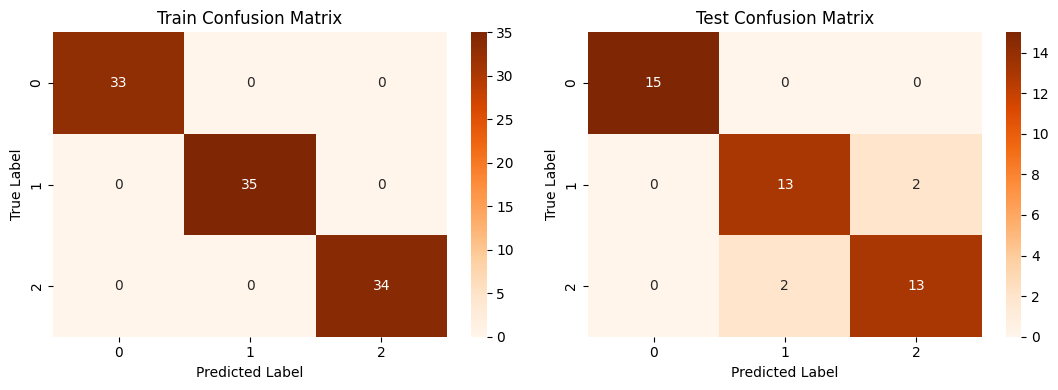


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        33 |
| 1            |           1 |        1 |          1 |        35 |
| 2            |           1 |        1 |          1 |        34 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       102 |
| weighted avg |           1 |        1 |          1 |       102 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.866667 | 0.866667 |   0.866667 | 15        |
| 2            |    0.866667 | 0.866667 |   0.866667 | 15        |
| accuracy     |    0.911111 | 0.911111 |   0.911111 |  0.911111 |
| m

In [105]:
dt_score = evaluate_model(dt_model, x_train, x_test, y_train, y_test)

In [106]:
score['Decision Tree'] = dt_score
score

,Neural Network tuned,Logistic regression,Logistic regression tuned,Decision Tree
Precision Train,0.981481,0.980672,0.980672,1.000000
Precision Test,0.960784,0.911111,0.911111,0.911111
Recall Train,0.980952,0.980672,0.980672,1.000000
Recall Test,0.955556,0.911111,0.911111,0.911111
Accuracy Train,0.980392,0.980392,0.980392,1.000000
Accuracy Test,0.955556,0.911111,0.911111,0.911111
F1 macro Train,0.980672,0.980672,0.980672,1.000000
F1 macro Test,0.955357,0.911111,0.911111,0.911111


In [108]:
dt_model2 = DecisionTreeClassifier(max_depth=optimal_params['max_depth'],
                                 min_samples_leaf=optimal_params['min_samples_leaf'],
                                 min_samples_split=optimal_params['min_samples_split'],
                                 random_state=20)

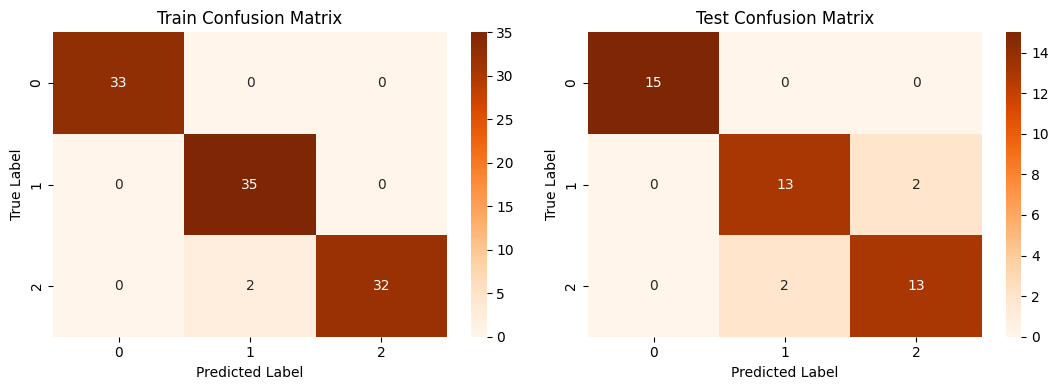


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  33        |
| 1            |    0.945946 | 1        |   0.972222 |  35        |
| 2            |    1        | 0.941176 |   0.969697 |  34        |
| accuracy     |    0.980392 | 0.980392 |   0.980392 |   0.980392 |
| macro avg    |    0.981982 | 0.980392 |   0.98064  | 102        |
| weighted avg |    0.981452 | 0.980392 |   0.980367 | 102        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.866667 | 0.866667 |   0.866667 | 15        |
| 2            |    0.866667 | 0.866667 |   0.866667 | 15        |
| accuracy     |    0.911111 | 0.911111 |   0.911111 |  0.9111

In [109]:
dt2_score = evaluate_model(dt_model2, x_train, x_test, y_train, y_test)

In [71]:
score

,Logistic regression,Decision Tree
Precision Train,NaN,NaN
Precision Test,NaN,NaN
Recall Train,0.980672,1.000000
Recall Test,0.911111,0.911111
Accuracy Train,0.980392,1.000000
Accuracy Test,0.911111,0.911111
F1 macro Train,0.980672,1.000000
F1 macro Test,0.911111,0.911111


In [110]:
score['Decision Tree tuned'] = dt2_score
score

,Neural Network tuned,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned
Precision Train,0.981481,0.980672,0.980672,1.000000,0.981982
Precision Test,0.960784,0.911111,0.911111,0.911111,0.911111
Recall Train,0.980952,0.980672,0.980672,1.000000,0.980392
Recall Test,0.955556,0.911111,0.911111,0.911111,0.911111
Accuracy Train,0.980392,0.980392,0.980392,1.000000,0.980392
Accuracy Test,0.955556,0.911111,0.911111,0.911111,0.911111
F1 macro Train,0.980672,0.980672,0.980672,1.000000,0.980640
F1 macro Test,0.955357,0.911111,0.911111,0.911111,0.911111


In [112]:
# ML Model - 3 Implementation
rf_model = RandomForestClassifier(random_state=0)

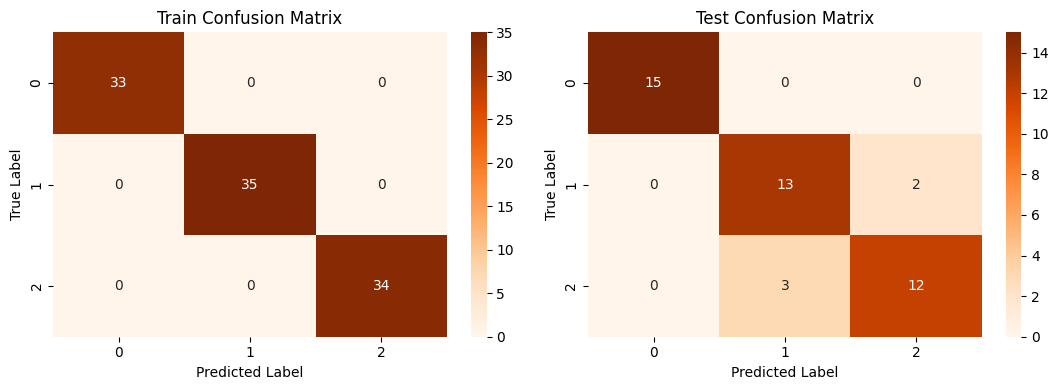


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        33 |
| 1            |           1 |        1 |          1 |        35 |
| 2            |           1 |        1 |          1 |        34 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       102 |
| weighted avg |           1 |        1 |          1 |       102 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.8125   | 0.866667 |   0.83871  | 15        |
| 2            |    0.857143 | 0.8      |   0.827586 | 15        |
| accuracy     |    0.888889 | 0.888889 |   0.888889 |  0.888889 |
| m

In [113]:
rf_score = evaluate_model(rf_model, x_train, x_test, y_train, y_test)

In [119]:
score['Random Forest'] = rf_score
score

,Neural Network tuned,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest
Precision Train,0.981481,0.980672,0.980672,1.000000,0.981982,1.000000
Precision Test,0.960784,0.911111,0.911111,0.911111,0.911111,0.889881
Recall Train,0.980952,0.980672,0.980672,1.000000,0.980392,1.000000
Recall Test,0.955556,0.911111,0.911111,0.911111,0.911111,0.888889
Accuracy Train,0.980392,0.980392,0.980392,1.000000,0.980392,1.000000
Accuracy Test,0.955556,0.911111,0.911111,0.911111,0.911111,0.888889
F1 macro Train,0.980672,0.980672,0.980672,1.000000,0.980640,1.000000
F1 macro Test,0.955357,0.911111,0.911111,0.911111,0.911111,0.888765


In [114]:
# Define the hyperparameter search space
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Number of trees in the forest
    'max_depth': [8, 9, 10, 11, 12, 13, 14, 15],  # Maximum depth of each tree
    'min_samples_split': [2, 3, 4, 5]  # Minimum samples required to split a node
}

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=0)  # Setting random state for reproducibility

# Employ RepeatedStratifiedKFold for robust cross-validation
cv_strategy = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Utilize RandomizedSearchCV for hyperparameter optimization
random_search = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_grid,  # Using 'param_distributions' for clarity
    cv=cv_strategy,
    n_iter=10,  # Number of parameter settings sampled
    n_jobs=-1,  # Use all available cores for parallel processing
    random_state=0  # Setting random state for reproducibility in random search
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Retrieve the optimal hyperparameters
best_params_rf = random_search.best_params_  # Renamed to 'best_params_rf' for clarity
print("Optimal Hyperparameters for Random Forest:", best_params_rf)

# You can now use the best hyperparameters to train your final model:
# best_rf_model = RandomForestClassifier(**best_params_rf, random_state=0)
# best_rf_model.fit(x_train, y_train)

Optimal Hyperparameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 15}


In [115]:
rf_model2 = RandomForestClassifier(n_estimators = best_params_rf['n_estimators'], # Use best_params_rf instead of best_params
                                 min_samples_leaf= best_params_rf['min_samples_split'], # Use best_params_rf instead of best_params
                                 max_depth = best_params_rf['max_depth'], # Use best_params_rf instead of best_params
                                 random_state=0)

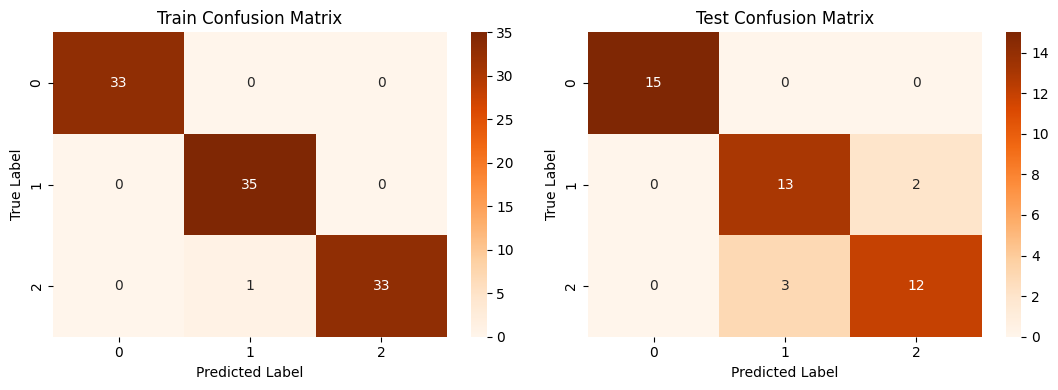


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  33        |
| 1            |    0.972222 | 1        |   0.985915 |  35        |
| 2            |    1        | 0.970588 |   0.985075 |  34        |
| accuracy     |    0.990196 | 0.990196 |   0.990196 |   0.990196 |
| macro avg    |    0.990741 | 0.990196 |   0.99033  | 102        |
| weighted avg |    0.990468 | 0.990196 |   0.990192 | 102        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.8125   | 0.866667 |   0.83871  | 15        |
| 2            |    0.857143 | 0.8      |   0.827586 | 15        |
| accuracy     |    0.888889 | 0.888889 |   0.888889 |  0.8888

In [116]:
rf2_score = evaluate_model(rf_model2, x_train, x_test, y_train, y_test)

In [118]:
score['Random Forest'] = rf2_score
score

,Neural Network tuned,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest
Precision Train,0.981481,0.980672,0.980672,1.000000,0.981982,0.990741
Precision Test,0.960784,0.911111,0.911111,0.911111,0.911111,0.889881
Recall Train,0.980952,0.980672,0.980672,1.000000,0.980392,0.990196
Recall Test,0.955556,0.911111,0.911111,0.911111,0.911111,0.888889
Accuracy Train,0.980392,0.980392,0.980392,1.000000,0.980392,0.990196
Accuracy Test,0.955556,0.911111,0.911111,0.911111,0.911111,0.888889
F1 macro Train,0.980672,0.980672,0.980672,1.000000,0.980640,0.990330
F1 macro Test,0.955357,0.911111,0.911111,0.911111,0.911111,0.888765


In [120]:
nn_model = MLPClassifier(random_state=0)

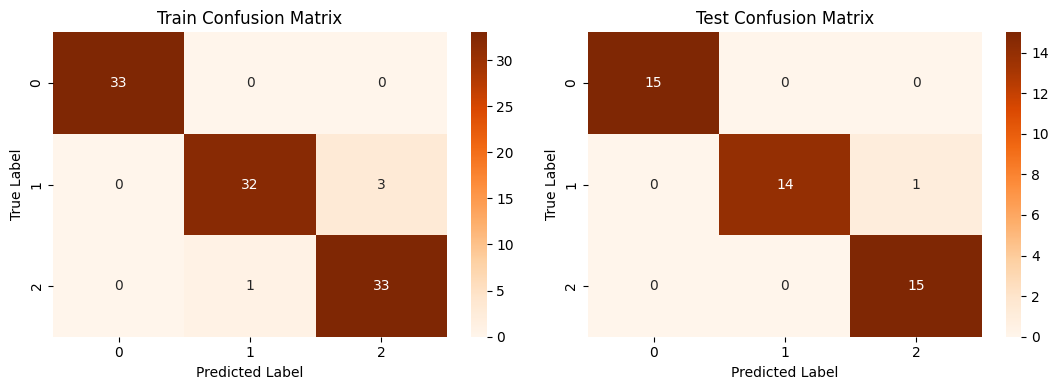


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  33        |
| 1            |    0.969697 | 0.914286 |   0.941176 |  35        |
| 2            |    0.916667 | 0.970588 |   0.942857 |  34        |
| accuracy     |    0.960784 | 0.960784 |   0.960784 |   0.960784 |
| macro avg    |    0.962121 | 0.961625 |   0.961345 | 102        |
| weighted avg |    0.961824 | 0.960784 |   0.960768 | 102        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    1        | 0.933333 |   0.965517 | 15        |
| 2            |    0.9375   | 1        |   0.967742 | 15        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [121]:
neural_score = evaluate_model(nn_model, x_train, x_test, y_train, y_test)

In [122]:
score['Neural Network'] = neural_score
score

,Neural Network tuned,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Neural Network
Precision Train,0.981481,0.980672,0.980672,1.000000,0.981982,1.000000,0.962121
Precision Test,0.960784,0.911111,0.911111,0.911111,0.911111,0.889881,0.979167
Recall Train,0.980952,0.980672,0.980672,1.000000,0.980392,1.000000,0.961625
Recall Test,0.955556,0.911111,0.911111,0.911111,0.911111,0.888889,0.977778
Accuracy Train,0.980392,0.980392,0.980392,1.000000,0.980392,1.000000,0.960784
Accuracy Test,0.955556,0.911111,0.911111,0.911111,0.911111,0.888889,0.977778
F1 macro Train,0.980672,0.980672,0.980672,1.000000,0.980640,1.000000,0.961345
F1 macro Test,0.955357,0.911111,0.911111,0.911111,0.911111,0.888765,0.977753


In [123]:
# Define the hyperparameter search space
param_distributions = {
    'hidden_layer_sizes': np.arange(10, 100, 10).tolist(),  # Convert to list for RandomizedSearchCV
    'alpha': np.arange(0.0001, 0.01, 0.0001).tolist()  # Convert to list for RandomizedSearchCV
}

# Initialize the Multi-layer Perceptron Classifier
mlp_classifier = MLPClassifier(random_state=0)

# Employ RepeatedStratifiedKFold for robust cross-validation
cv_strategy = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Utilize RandomizedSearchCV for hyperparameter optimization
randomized_search = RandomizedSearchCV(
    estimator=mlp_classifier,
    param_distributions=param_distributions,  # Using 'param_distributions' for clarity
    n_iter=10,  # Number of parameter settings sampled
    cv=cv_strategy,
    n_jobs=-1,  # Use all available cores for parallel processing
    random_state=0  # Setting random state for reproducibility in random search
)

# Fit the RandomizedSearchCV to the training data
randomized_search.fit(x_train, y_train)

# Retrieve the optimal hyperparameters
optimal_hyperparameters = randomized_search.best_params_
print("Optimal Hyperparameters:", optimal_hyperparameters)

Optimal Hyperparameters: {'hidden_layer_sizes': 40, 'alpha': 0.0029}


In [94]:
nn_model2 = MLPClassifier(hidden_layer_sizes = optimal_hyperparameters['hidden_layer_sizes'],
                        alpha = optimal_hyperparameters['alpha'],
                        random_state = 0)

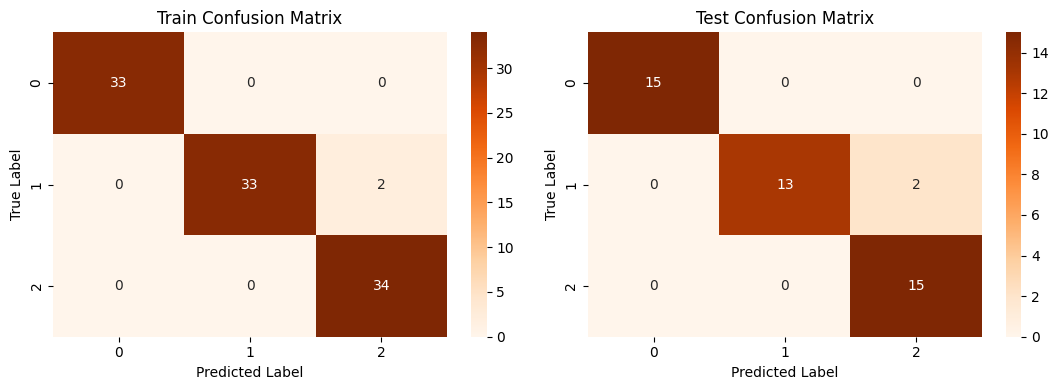


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  33        |
| 1            |    1        | 0.942857 |   0.970588 |  35        |
| 2            |    0.944444 | 1        |   0.971429 |  34        |
| accuracy     |    0.980392 | 0.980392 |   0.980392 |   0.980392 |
| macro avg    |    0.981481 | 0.980952 |   0.980672 | 102        |
| weighted avg |    0.981481 | 0.980392 |   0.980384 | 102        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    1        | 0.866667 |   0.928571 | 15        |
| 2            |    0.882353 | 1        |   0.9375   | 15        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

In [95]:
neural2_score = evaluate_model(nn_model2, x_train, x_test, y_train, y_test)

In [124]:
score['Neural Network tuned']= neural2_score

In [125]:
score


,Neural Network tuned,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Neural Network
Precision Train,0.981481,0.980672,0.980672,1.000000,0.981982,1.000000,0.962121
Precision Test,0.960784,0.911111,0.911111,0.911111,0.911111,0.889881,0.979167
Recall Train,0.980952,0.980672,0.980672,1.000000,0.980392,1.000000,0.961625
Recall Test,0.955556,0.911111,0.911111,0.911111,0.911111,0.888889,0.977778
Accuracy Train,0.980392,0.980392,0.980392,1.000000,0.980392,1.000000,0.960784
Accuracy Test,0.955556,0.911111,0.911111,0.911111,0.911111,0.888889,0.977778
F1 macro Train,0.980672,0.980672,0.980672,1.000000,0.980640,1.000000,0.961345
F1 macro Test,0.955357,0.911111,0.911111,0.911111,0.911111,0.888765,0.977753


In [126]:
# Removing the overfitted models which have precision, recall, f1 scores for train as 1
score_t = score.transpose()            # taking transpose of the score dataframe to create new difference column
remove_models = score_t[score_t['Recall Train']>=0.98].index  # creating a list of models which have 1 for train and score_t['Accuracy Train']==1.0 and score_t['Precision Train']==1.0 and score_t['F1 macro Train']==1.0
remove_models

adj = score_t.drop(remove_models)                     # creating a new dataframe with required models
adj


,Precision Train,Precision Test,Recall Train,Recall Test,Accuracy Train,Accuracy Test,F1 macro Train,F1 macro Test
Neural Network,0.962121,0.979167,0.961625,0.977778,0.960784,0.977778,0.961345,0.977753


In [127]:

def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df[metric + ' Test'].max()
        best_model_test = df[df[metric + ' Test'] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

In [128]:
metrics = ['Precision', 'Recall', 'Accuracy', 'F1 macro']

best_models = select_best_model(adj, metrics)
print("The best models are:")
for metric, best_model in best_models.items():
    print(f"{metric}: {best_model} - {adj[metric+' Test'][best_model].round(4)}")

The best models are:
Precision: Neural Network - 0.9792
Recall: Neural Network - 0.9778
Accuracy: Neural Network - 0.9778
F1 macro: Neural Network - 0.9778


In [129]:
# Take recall as the primary evaluation metric
score_smpl = score.transpose()
remove_overfitting_models = score_smpl[score_smpl['Recall Train']>=0.98].index
remove_overfitting_models
new_score = score_smpl.drop(remove_overfitting_models)
new_score = new_score.drop(['Precision Train','Precision Test','Accuracy Train','Accuracy Test','F1 macro Train','F1 macro Test'], axis=1)
new_score.index.name = 'Classification Model'
print(new_score.to_markdown())

| Classification Model   |   Recall Train |   Recall Test |
|:-----------------------|---------------:|--------------:|
| Neural Network         |       0.961625 |      0.977778 |


In [130]:
Category_RF = ['Iris-Setosa', 'Iris-Versicolor', 'Iris-Virginica']

In [131]:
import numpy as np

x_rf = np.array([[5.1, 3.5, 1.4, 0.2]])
Category_RF = ['Iris-Setosa', 'Iris-Versicolor', 'Iris-Virginica']  # Assuming this is defined

# Predictions using each model:
models = {
    "Logistic Regression": lr_model2,
    "Decision Tree": dt_model2,
    "Random Forest": rf_model2,
    "Neural Network": nn_model2
}

for model_name, model in models.items():
    prediction = model.predict(x_rf)
    predicted_category = Category_RF[int(prediction[0])]
    print(f"{model_name} prediction: {predicted_category}")

Logistic Regression prediction: Iris-Setosa
Decision Tree prediction: Iris-Setosa
Random Forest prediction: Iris-Setosa
Neural Network prediction: Iris-Setosa
